# Notebook 22: Multiple Linear Regression
***

We'll need Numpy, Matplotlib, Pandas, and scipy.stats for this notebook, so let's load them. 

In [1]:
import numpy as np 
from scipy import stats
import pandas as pd
import matplotlib.pylab as plt 
%matplotlib inline

### Exercise 1 - Advertising Budgets and Simple Linear Regression
*** 

The data in advertising.csv concerns the sales of a particular product in $\color{green}{\text{200 different markets}}$, along with advertising budgets for each market for three different media types: $\color{blue}{\text{TV, Radio, and Newspaper}}$.  The $\color{red}{\text{sales}}$ feature is given in thousands of units, and each of the advertising budget features are given in thousands of dollars.


**Part A**: Load the data into a Pandas DataFrame. 

In [2]:
dfAd = pd.read_csv("advertising.csv")
dfAd.head()

,tv,radio,news,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


**Part B**: Run the following code to make $\color{red}{\text{three separate scatter plots}}$ depicting the relationships between each of the features, $\texttt{TV}$, $\texttt{radio}$, and $\texttt{news}$ on the response variable $\texttt{sales}$. From the plots, can you determine whether there appears to be a $\color{red}{\text{relationship}}$ between each of the advertising media types and the sales of the product? 

0 tv
1 radio
2 news


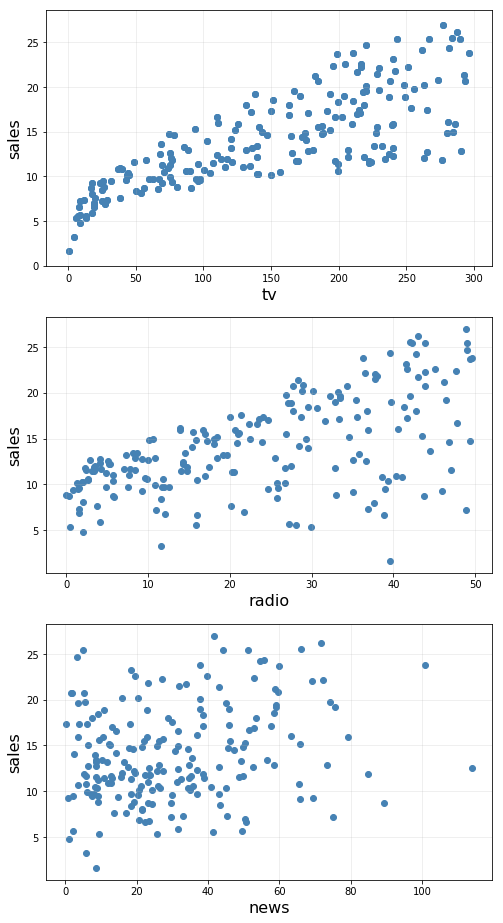

In [33]:
media = ["tv", "radio", "news"]

fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(8,16))
axes[0].scatter(dfAd["tv"], dfAd["sales"])

for axi, m in enumerate(media): 
    axes[axi].scatter(dfAd[m], dfAd["sales"], color="steelblue")
    axes[axi].grid(alpha=0.25)
    axes[axi].set_xlabel(m, fontsize=16)
    axes[axi].set_ylabel("sales", fontsize=16)
    print(axi, m)

**Part C**: Use [stats.linregress](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.linregress.html) to fit three $\color{red}{\text{simple linear regression}}$ models to the data of the form 

$$
Y_i = \alpha + \beta x_i + \epsilon_i, \quad \textrm{for } i=1,2, \ldots, n
$$

where $x$ is a particular media type and  $\epsilon \sim N(0,\sigma^2)$. Interpret your results.   

In [4]:
media = ["tv", "radio", "news"]

for m in media: 
    print("SLR for {} vs sales".format(m))
    print("----------------------")
    bhat, ahat, rval, pval, stderr = stats.linregress(dfAd[m], dfAd["sales"])
    print("intercept = {:.4f}".format(ahat))
    print("slope = {:.4f}".format(bhat))
    print("p-value = {}".format(pval))
    print("stderr = {}".format(stderr))
    print("R2 = {}".format(rval**2))
    print("\n")

SLR for tv vs sales
----------------------
intercept = 7.0326
slope = 0.0475
p-value = 1.4673897001948012e-42
stderr = 0.0026906071877968703
R2 = 0.6118750508500707


SLR for radio vs sales
----------------------
intercept = 9.3116
slope = 0.2025
p-value = 4.354966001766976e-19
stderr = 0.02041130636009063
R2 = 0.332032455445295


SLR for news vs sales
----------------------
intercept = 12.3514
slope = 0.0547
p-value = 0.0011481958688882112
stderr = 0.016575721876358154
R2 = 0.05212044544430501




### Exercise 2 - Advertising Budgets and Multiple Linear Regression
*** 

In this exercise you'll fit a $\color{red}{\text{multiple linear regression model}}$ to the advertising data.  For this we'll need a package that we haven't encountered yet called [statsmodels](http://www.statsmodels.org/stable/index.html).  We load it as follows.  Note that you might get a FutureWarning from Pandas.  This is expected. 


`statsmodels` can also do SLR. This is just an introduction to yet another stats package.

In [5]:
import statsmodels.api as sm 

**Part A**: The following code will $\color{red}{\text{fit an MLR model to the data}}$. Note that the `add_constant` function is necessary in order to include an intercept term in the MLR model. 

$$
\hat{y} = \color{red}{\alpha} + \beta_1 x_1 + \beta_2 x_2+ \beta_3 x_3 + \epsilon
$$

In [6]:
# Collect the features in a 2D array 
X = dfAd[["tv", "radio", "news"]]
# X only stores the independent variables
#print(X)
# Add a constant to the array for the intercept 
X = sm.add_constant(X)
#print(X)
# Collect the response data in an array 
y = dfAd["sales"]

# Fit the ordinary least-squares (OLS) model 
#model = sm.OLS(y, X).fit()
#model.summary()
model = sm.OLS(y, X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Sun, 14 Nov 2021   Prob (F-statistic):           1.58e-96
Time:                        13:58:33   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9389      0.312      9.422      0.000       2.324       3.554
tv             0.0458      0.001     32.809      0.000       0.043       0.049
radio          0.1885      0.009     21.893      0.000       0.172       0.206
news          -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The estimated parameters for the model are stored in model.params.  In this case, because we got $X$ from a Pandas DataFrame, the resulting model parameters are stored in a Pandas Series. 

In [7]:
print(results.params)

const    2.938889
tv       0.045765
radio    0.188530
news    -0.001037
dtype: float64


**Part C**: Based on the parameters estimated by the model, replace the unknown $\hat{\beta}_j$ parameters below with the actual values in the model 

$$
\texttt{sales} = \hat{\beta_0} + \hat{\beta_1} \times \texttt{TV} + \hat{\beta_2} \times \texttt{radio} + \hat{\beta_3} \times \texttt{news}
$$

Solution:
$$
\texttt{sales} = 2.938889 + 0.045765 \times \texttt{TV} + 0.188530 \times \texttt{radio} + (-0.001037) \times \texttt{news}
$$

**Part D**: $\color{red}{\text{Compare and contrast}}$ the model parameters obtained from $\color{red}{\text{multiple linear regression}}$ with those obtained from the individual $\color{red}{\text{simple linear regression}}$ models obtained in Exercise 1.  Does something seem fishy? 

Recall:

SLR for tv vs sales
----------------------
intercept = 7.0326

slope = 0.0475

$\color{blue}{\text{p-value = 1.4673897001948012e-42}}$

stderr = 0.0026906071877968703

R2 = 0.6118750508500707

SLR for radio vs sales
----------------------
intercept = 9.3116

slope = 0.2025

$\color{blue}{\text{p-value = 4.354966001766976e-19}}$

stderr = 0.02041130636009063

R2 = 0.332032455445295

SLR for news vs sales
----------------------
intercept = 12.3514

slope = 0.0547

$\color{red}{\text{p-value = 0.0011481958688882112}}$

stderr = 0.016575721876358154

R2 = 0.05212044544430501

In [8]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Sun, 14 Nov 2021   Prob (F-statistic):           1.58e-96
Time:                        13:58:33   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9389      0.312      9.422      0.000       2.324       3.554
tv             0.0458      0.001     32.809      0.000       0.043       0.049
radio          0.1885      0.009     21.893      0.000       0.172       0.206
news          -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

$\color{red}{\text{Notice SLR gave a p-vaue of 0.001148 for the coefficient in the news-sales relationship,}}$
$\color{red}{\text{while MLR gave a p-value of 0.860.}}$

**Part E**: We can compute the pair-wise correlation between each of the features directly from the DataFrame using Pandas .corr() function. 

In [9]:
dfAd[["tv", "radio", "news"]].corr()

,tv,radio,news
tv,1.000000,0.054809,0.056648
radio,0.054809,1.000000,0.354104
news,0.056648,0.354104,1.000000


Does any pair of features seem particularly correlated?  Can you use this to explain the fishiness observed in **Part D**? 

Radio and News are highly correlated. Are they doing the same thing?

**Part F:** Now we refit the MLR models without news. 

Note: If you use the following code block for a single feature, it is the same as linregress.

In [10]:
# Collect the features in a 2D array 
X = dfAd[["tv", "radio"]]

# Add a constant to the array for the intecept 
X = sm.add_constant(X)

# Collect the response data in an array 
y = dfAd["sales"]

# Fit the ordinary least-squares (OLS) model, now with just tv and radio. 
model = sm.OLS(y, X).fit()

In [11]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     859.6
Date:                Sun, 14 Nov 2021   Prob (F-statistic):           4.83e-98
Time:                        13:58:33   Log-Likelihood:                -386.20
No. Observations:                 200   AIC:                             778.4
Df Residuals:                     197   BIC:                             788.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9211      0.294      9.919      0.000       2.340       3.502
tv             0.0458      0.001     32.909      0.000       0.043       0.048
radio          0.1880      0.008     23.382      0.000       0.172       0.204
==============================================================================
Omnibus:                       60.022   Durbin-Watson:                   2.081
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              148.679
Skew:                          -1.323   Prob(JB):                     5.19e-33
Kurtosis:                       6.292   Cond. No.                         425.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

This is a simpler model with the same $R^2$ as before but a larger F-statistic. This is desirable.

### Exercise 3 - Polynomial Regression via Multiple Linear Regression 
*** 

It's not too difficult to believe that some relationships between features and the response are $\color{red}{\text{nonlinear}}$. Consider the following example, where the single feature $x$ and the response $y$ have a quadratic relationship of the form 

$$
Y = \frac{1}{4} - X + X^2 + \epsilon 
$$

The following code samples $n=30$ data points from the $\color{red}{\text{true model}}$, fits the $\color{red}{\text{SLR model}}$, and plots it against the data. It should be clear from both the picture and the $R^2$-value that the SLR model is a very poor fit of the data. 

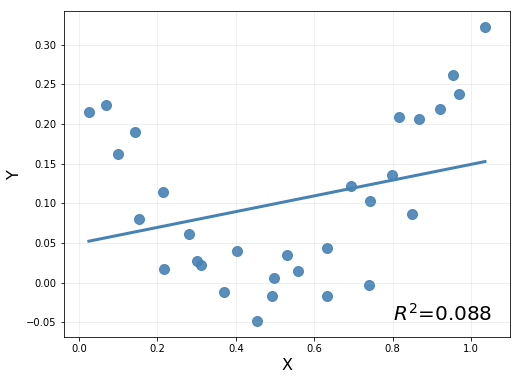

In [12]:
# Generate Data
n = 30
sig = 0.05
x = np.linspace(0,1,n) + 0.05*np.random.rand(n) 
  # x is an array that contains 30 values between 0 and 1 added to
  # 0.05 * a random number between 0 and 1.
y = 0.25 - x + x**2 + stats.norm.rvs(0,sig,size=n)
  # y is an array of values from the line y = .25 - x + x^2 with noise added in.

# Fit SLR model 
bhat, ahat, rval, pval, stderr = stats.linregress(x, y)

# Plot data and SLR model 
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8,6))
xplot = np.linspace(np.min(x), np.max(x))
  # evenly spaced values between min(x) and max(x). Default is 50 values.
ax.plot(xplot, ahat + bhat*xplot, color="steelblue", lw=3)
  # The best fit line
ax.scatter(x, y, color="steelblue", s=100, alpha=0.9)
  # The parabola-like scattering of points.
ax.grid(alpha=0.25)
ax.set_xlabel("X", fontsize=16)
ax.set_ylabel("Y", fontsize=16)
ax.text(0.8, np.min(y)+.00, r"$R^2$={:.3f}".format(rval**2), fontsize=20);

This parabola-like scatterplot and the low R^2 indicate a poor fit.

**Part A**: We can fit a **polynomial** model to the single-feature data by $\color{red}{\text{thinking of the polynomial features as features in a multiple linear regression model}}$.  If we make the association  

$$
x_1 = x \quad \textrm{and} \quad x_2 = x^2 
$$

then we can fit a multiple linear regression of the form 

$$
\hat{y} = \hat{\beta}_0 + \hat{\beta}_1 x_1 + \hat{\beta}_2 x_2 
$$

Let's see how we can do this in python. 

In [13]:
# Collect the linear feature x and it's square in an array 
X = np.column_stack((x, x**2))
  # This is a 30 by 2 matrix filled with x and x^2
#print(X)
# Add a constant to the array for the intecept 
X = sm.add_constant(X)
  # Now X has 3 columns. The first is filled with '1'.

# Fit the ordinary least-squares (OLS) model 
polymodel = sm.OLS(y, X).fit()

# Print estimated parameters 
print(polymodel.params)


[ 0.25759553 -1.06390523  1.10800265]


**Part B**: Write down the estimated MLR model in terms of the features $x_1$ and $x_2$ as well as the interpretation of the associated polynomial model in terms of the single feature $x$. Does this model seem close to the true model that the data was generated from?  

In [14]:
print(polymodel.params[0])
print(polymodel.params[1])
print(polymodel.params[2])

0.2575955264876223
-1.063905230305919
1.1080026534900034


We have 

$$
\hat{y} = 0.2576 - 1.0639 x_1 + 1.1080 x_2 \quad \textrm{and} \quad 
\hat{y} = 0.2575 - 1.0639 x + 1.1080 x^2 
$$

$$
Y = \frac{1}{4} - X + X^2 + \epsilon 
$$

Yes, it seems very close to the true model that the data was generated from. 
The true model had coefficients of '1'.

Every unit increase in'x' (the feature) causes y (the dependent/response/target variable) to decrease by 1.0639 and increase by 1.1080 * $x^2$.

**Part C**: Modify the code below to plot the obtained polynomial regression model against the data.  How does it look?  

Fit a polynomial, not a line! i.e., we are going to plot $\hat{y} = 0.2576 - 1.0639 x_1 + 1.1080 x_2$

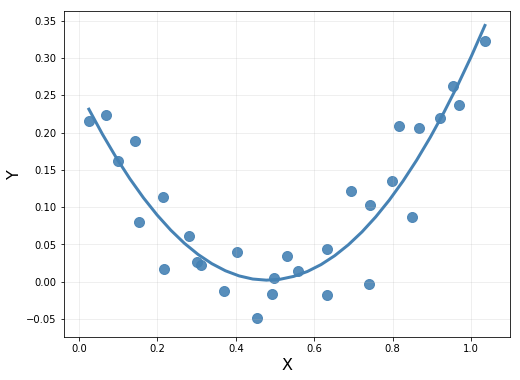

In [15]:
# Plot data and SLR model

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8,6))
xplot = np.linspace(np.min(x), np.max(x),30)
yplot = polymodel.params[0]+polymodel.params[1]*xplot+polymodel.params[2]*xplot*xplot
  # This is the parabola y-values using the aformentioned coefficients.
ax.plot(xplot, yplot, color="steelblue", lw=3)
ax.scatter(x, y, color="steelblue", s=100, alpha=0.9)
ax.grid(alpha=0.25)
ax.set_xlabel("X", fontsize=16)
ax.set_ylabel("Y", fontsize=16);

**Part D:** Calculate the sum of squared errors, the total sum of squares, and the coefficient of determination for this polynomial regression model. How does the $R^2$ value compare to the linear regression of **Part A**?

$\color{red}{\text{We are calculating our own $R^2$ for the parabolic fit.}}$ Our $R^2$ should be better than the $R^2$ for the line.

In [25]:
yhat = polymodel.params[0]+polymodel.params[1]*x+polymodel.params[2]*x*x
ybar = np.mean(y)
SSE = np.sum((y-yhat)**2)
SST = np.sum((y-ybar)**2)

R2 = 1-SSE/SST
print(R2)
polymodel.summary()
  # polymodel is our OLS fit for x_1 = x  and x_2 = x^2

0.8425392283274447


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     72.24
Date:                Sun, 14 Nov 2021   Prob (F-statistic):           1.45e-11
Time:                        14:19:01   Log-Likelihood:                 54.513
No. Observations:                  30   AIC:                            -103.0
Df Residuals:                      27   BIC:                            -98.82
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2576      0.024     10.772      0.000       0.209       0.307
x1            -1.0639      0.105    -10.090      0.000      -1.280      -0.848
x2             1.1080      0.097     11.371      0.000       0.908       1.308
==============================================================================
Omnibus:                        0.110   Durbin-Watson:                   3.109
Prob(Omnibus):                  0.947   Jarque-Bera (JB):                0.329
Skew:                          -0.031   Prob(JB):                        0.848
Kurtosis:                       2.491   Cond. No.                         23.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Exercise 4 - Guessing Polynomial Features from Residual Plots 
*** 

In the previous exercise we looked for a polynomial regression model that was quadratic because we already knew the true form of the model $\color{blue}{\text{(which never happens in practice)}}$.  If we don't know how many polynomial features to include in our regression model, we can gain insight into which features might be missing by plotting the associated residuals.  Recall that the residual is the difference between the true response value $y$ and the response predicted by the model, $\hat{y}$: 

$$
r_i = y_i - \hat{y}_i 
$$

**Part A**: Suppose that your data really is linear.  What do you expect a scatter plot of the residuals to look like? 

normally distributed about 0

**Note**: Before continuing, scroll down and execute the cell in the **Helper Functions** section at the bottom of this notebook. 

**Part B**: The following code samples data from a true linear model, fits a SLR model to it, and plots the model and the associated residuals.  Does the residual plot agree with what you concluded in **Part A**? 

Fitted PLR Model: yhat = 0.819 + 0.592 x^1 

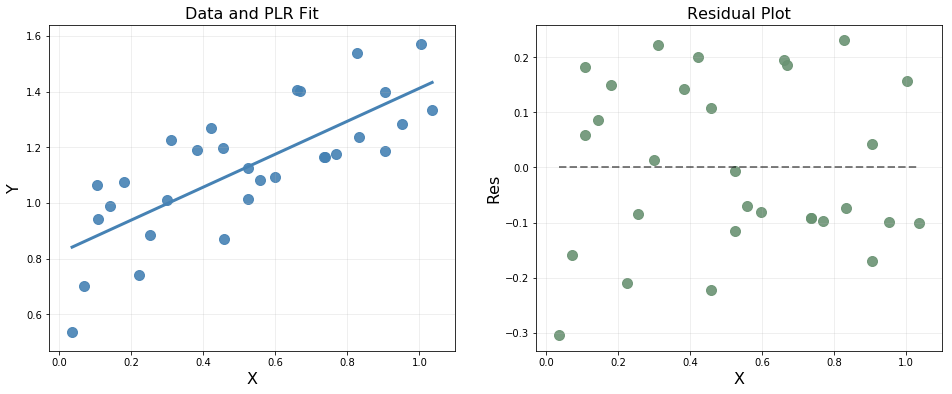

In [27]:
X, y = nonlinear_data(dataset=0)
fit_and_res_plot(X, y)

**Part C**: Now consider a data set that is not linear.  What do you notice about the associated residual plot? 

Fitted PLR Model: yhat = 0.127 + 0.020 x^1 

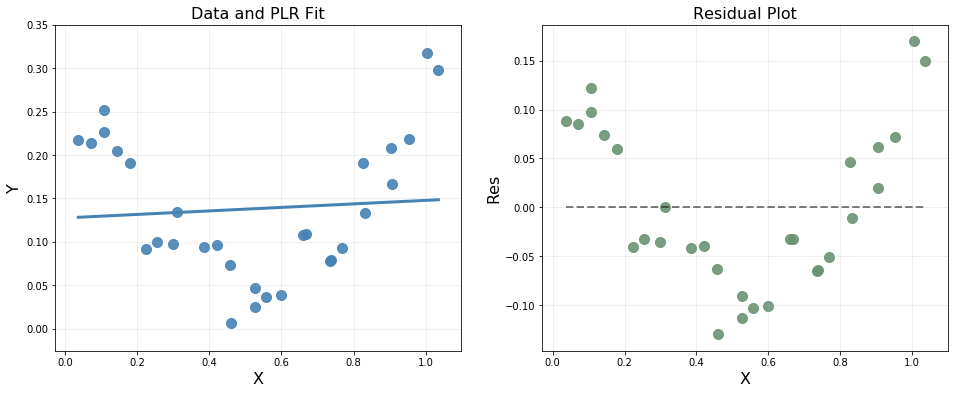

In [28]:
X, y = nonlinear_data(dataset=1)
fit_and_res_plot(X, y)

**Part D**: What polynomial feature do you think is missing?  Complete the following code be adding the missing feature and running the fit again.  What does the residual plot look like now? 

Fitted PLR Model: yhat = 0.302 + -0.964 x^1 + 0.936 x^2 

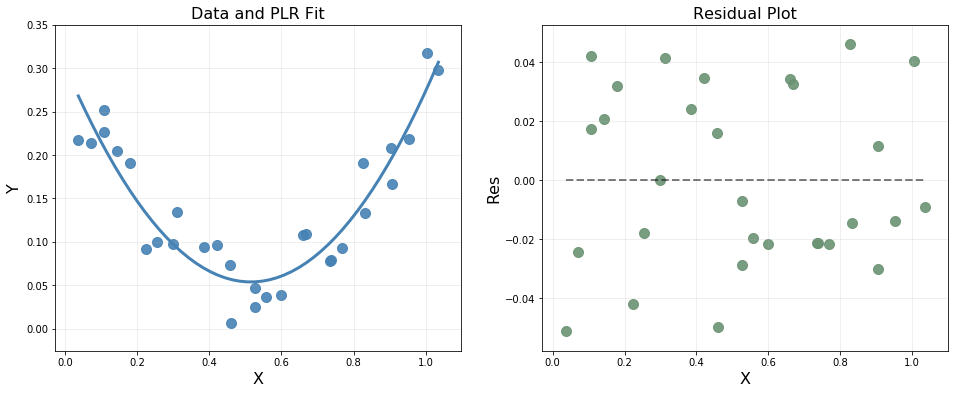

In [29]:
X, y = nonlinear_data(dataset=1)
X = np.column_stack((X,X*X)) 
fit_and_res_plot(X, y)

**Part E**: OK, one more dataset.  See if you can figure out the missing features and obtain a polynomial regression model that fits the data. 

Fitted PLR Model: yhat = 0.788 + 1.432 x^1 

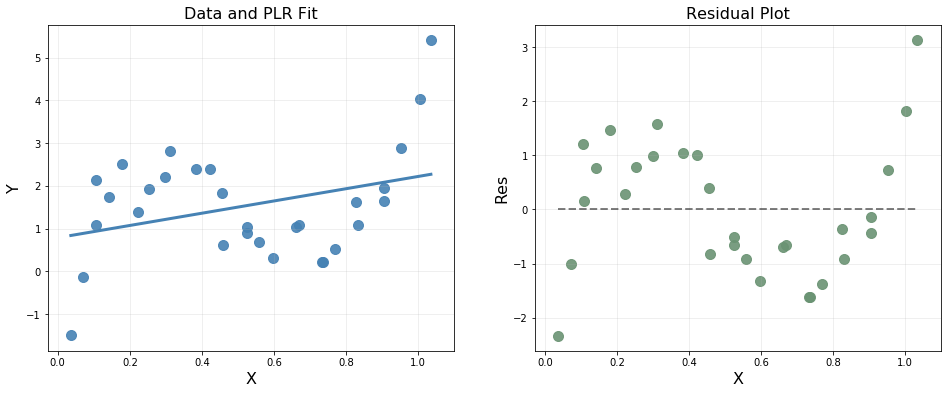

In [31]:
X, y = nonlinear_data(dataset=2)
fit_and_res_plot(X, y)

Fitted PLR Model: yhat = -1.662 + 31.792 x^1 + -76.706 x^2 + 50.760 x^3 

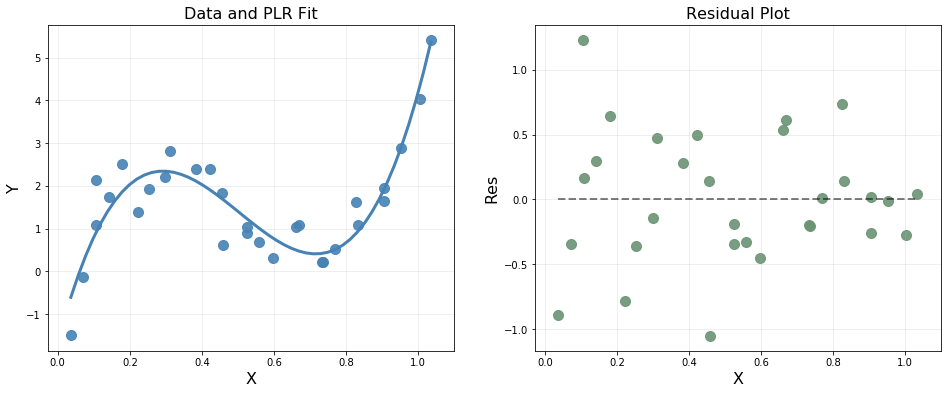

In [32]:
X = np.column_stack((X,X*X, X*X*X)) 
fit_and_res_plot(X, y)

<br><br><br><br>
<br><br><br><br>
<br><br><br><br>
<br><br><br><br>

### Helper Functions
***

In [26]:
def nonlinear_data(dataset, n=30):
    
    if dataset < 0 or dataset > 2: 
        print("Datasets must be numbered 0-2.  Defaulting to 0.")
        dataset = 0
    
    np.random.seed(1237)
    
    X = np.linspace(0,1,n) + .05 * np.random.rand(n)
    
    if dataset == 0: 
        return X, 0.5 + 0.75 * X + .5*np.random.rand(n)
    elif dataset == 1: 
        return X, 0.25 - X + X*X + .1*np.random.rand(n)
    elif dataset == 2: 
        return X, 2*(3*(2*x-1.2)**3 + 2*(2*x-1.2)**2 -(2*x-1.2)) + 1.5*np.random.rand(n)

def fit_and_res_plot(X, y, hint=False):
    
    if len(X.shape)==1:
        x = X
    else:
        x = X[:,0]
    
    # Fit Data 
    X = sm.add_constant(X)
    model = sm.OLS(y, X).fit() 
    
    # Print fitted model 
    print("Fitted PLR Model: yhat = ", end="")
    for p, beta in enumerate(model.params):
        print("{:.3f}".format(beta), end="")
        if p > 0: 
            print(" x^{} ".format(p), end="")
        else:
            print(" ", end="")
        if p != len(model.params)-1:
            print("+ ", end="")
            
    # Plot data/fit 
    yhat = model.predict(X)
    res = y - yhat 
    xp = np.linspace(np.min(x), np.max(x), 50)
    yp = np.zeros(len(xp))
    for p, beta in enumerate(model.params):
        yp += beta * xp**p 
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16,6))
    axes[0].scatter(x, y, color="steelblue", s=100, alpha=0.9)
    axes[0].plot(xp, yp, color="steelblue", lw=3)
    axes[0].grid(alpha=0.25)
    axes[0].set_xlabel("X", fontsize=16)
    axes[0].set_ylabel("Y", fontsize=16)
    axes[0].set_title("Data and PLR Fit", fontsize=16)
    
    # Plot residuals 
    axes[1].plot([np.min(x), np.max(x)], [0, 0], lw=2, ls="--", alpha=0.5, color="black")
    axes[1].scatter(x, res, color="#6a9373", s=100, alpha=0.9)
    axes[1].grid(alpha=0.25)
    axes[1].set_xlabel("X", fontsize=16)
    axes[1].set_ylabel("Res", fontsize=16)
    axes[1].set_title("Residual Plot", fontsize=16)